In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [17]:
data=pd.read_excel('/content/Apple_dataset_2.xlsx')

In [18]:
data.shape

(621, 5)

In [19]:
prices=data['Close'].values

In [20]:
prices

array([ 75.087502,  74.357498,  74.949997,  74.597504,  75.797501,
        77.407501,  77.582497,  79.239998,  78.169998,  77.834999,
        78.809998,  79.682503,  79.142502,  79.425003,  79.807503,
        79.577499,  77.237503,  79.422501,  81.084999,  80.967499,
        77.377502,  77.165001,  79.712502,  80.362503,  81.302498,
        80.0075  ,  80.387497,  79.902496,  81.800003,  81.217499,
        81.237503,  79.75    ,  80.904999,  80.074997,  78.262497,
        74.544998,  72.019997,  73.162498,  68.379997,  68.339996,
        74.702499,  72.330002,  75.684998,  73.230003,  72.2575  ,
        66.542503,  71.334999,  68.857498,  62.057499,  69.4925  ,
        60.552502,  63.215   ,  61.6675  ,  61.195   ,  57.310001,
        56.092499,  61.720001,  61.380001,  64.610001,  61.935001,
        63.702499,  63.572498,  60.227501,  61.232498,  60.352501,
        65.6175  ,  64.857498,  66.517502,  66.997498,  68.3125  ,
        71.762497,  71.107498,  71.672501,  70.699997,  69.232

In [21]:
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))


In [22]:
sequence_length = 30  # Adjust this to your desired sequence length
X, y = [], []

for i in range(len(prices_scaled) - sequence_length):
    X.append(prices_scaled[i:i+sequence_length])
    y.append(prices_scaled[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [23]:
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:

model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
15/15 [==============================] - 7s 31ms/step - loss: 0.0403
Epoch 2/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0080
Epoch 3/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0032
Epoch 4/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0025
Epoch 5/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0020
Epoch 6/50
15/15 [==============================] - 0s 33ms/step - loss: 0.0020
Epoch 7/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0019
Epoch 8/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0019
Epoch 9/50
15/15 [==============================] - 0s 33ms/step - loss: 0.0018
Epoch 10/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0018
Epoch 11/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0017
Epoch 12/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0017
Epoch 13/50
15/15 [==================

In [26]:
y_pred = model.predict(X_test)

# Inverse transform to get the actual price values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


4/4 [==============================] - 1s 10ms/step


Mean Squared Error: 42.753526093329405


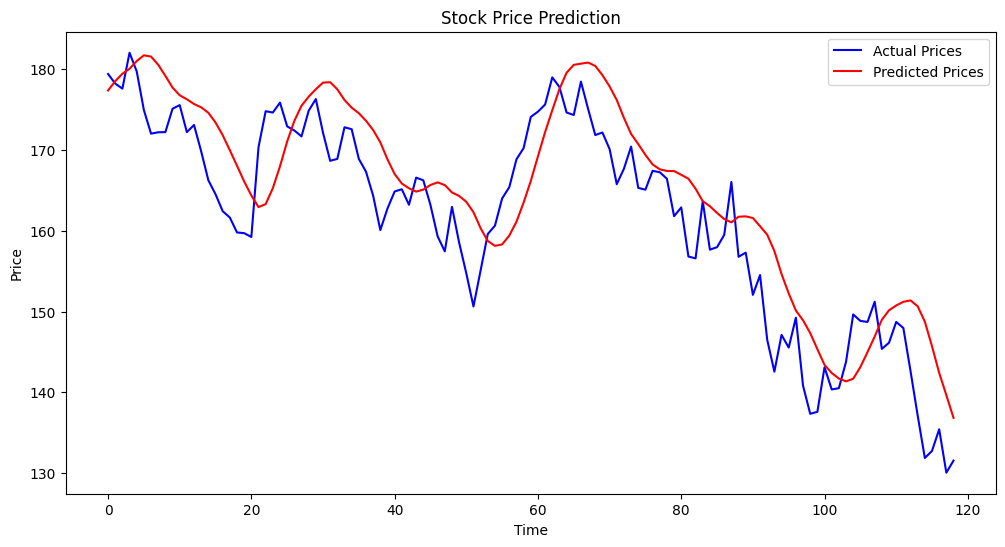

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the predictions vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='b')
plt.plot(y_pred, label='Predicted Prices', color='r')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [28]:
y_pred

array([[177.34349],
       [178.48532],
       [179.40944],
       [180.02591],
       [180.9834 ],
       [181.6872 ],
       [181.53455],
       [180.5247 ],
       [179.14734],
       [177.6997 ],
       [176.75003],
       [176.25354],
       [175.66476],
       [175.25708],
       [174.58006],
       [173.38008],
       [171.81157],
       [169.94354],
       [168.0316 ],
       [166.08089],
       [164.35477],
       [162.91524],
       [163.28772],
       [165.25853],
       [167.9692 ],
       [171.03291],
       [173.57387],
       [175.44772],
       [176.57236],
       [177.4928 ],
       [178.31036],
       [178.36282],
       [177.48154],
       [176.16293],
       [175.21706],
       [174.53001],
       [173.5955 ],
       [172.4473 ],
       [170.92497],
       [168.8224 ],
       [167.00493],
       [165.8367 ],
       [165.23967],
       [164.83174],
       [165.0785 ],
       [165.65038],
       [165.97533],
       [165.64154],
       [164.72894],
       [164.29663],
